# Visualização de dados incorporada do Pandas

Nesta palestra, aprenderemos sobre capacidades integradas de pandas para visualização de dados. É construído em matplotlib, mas foi inserido no pandas para um uso mais fácil!

Vamos dar uma olhada!

## Imports

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import matplotlib.dates as dates
import datetime as dt

## Os dados

Existem alguns arquivos csv de dados falsos que você pode ler como dados:

In [3]:
df1 = pd.read_csv('data/df1',index_col=0)
df2 = pd.read_csv('data/df2')

## Folhas de estilo

Matplotlib tem [folhas de estilo](http://matplotlib.org/gallery.html#style_sheets) que você pode usar para tornar seus plots mais agradáveis. Essas folhas de estilo incluem plot_bmh, plot_fivethirtyeight, plot_ggplot e muito mais. Eles basicamente criam um conjunto de regras de estilo que seus plots seguirão. Eu recomendo usá-los dado que eles farão seus plots terem uma aparência muito mais profissional. Você pode até mesmo criar o seu próprio caso você deseja que os gráficos de sua empresa tenham todos o mesmo aspecto (é um pouco tedioso para criar).

Aqui é como usá-los.

** Antes de plt.style.use (), seus plots são assim: **

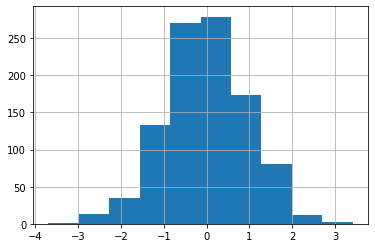

In [4]:
df1['A'].hist()

Aplicando o estilo:

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Now your plots look like this:

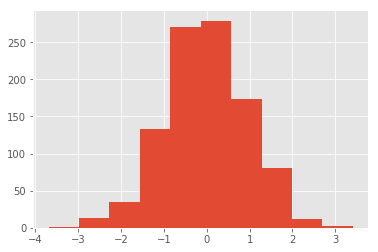

In [6]:
df1['A'].hist()

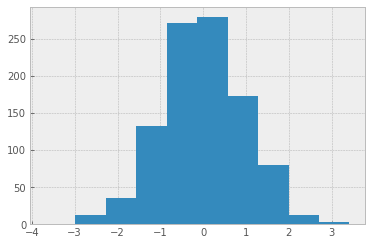

In [7]:
plt.style.use('bmh')
df1['A'].hist()

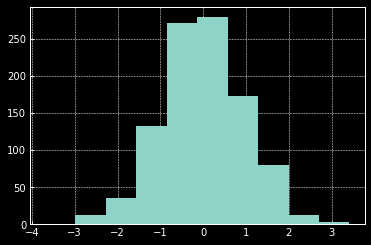

In [8]:
plt.style.use('dark_background')
df1['A'].hist()

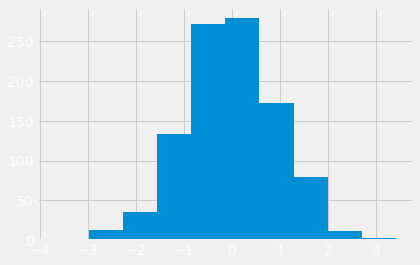

In [9]:
plt.style.use('fivethirtyeight')
df1['A'].hist()

In [10]:
plt.style.use('ggplot')

Vamos ficar com o estilo ggplot e, na verdade, mostramos como utilizar os recursos de traçabilidade embutidos no pandas!

# Tipos de plotagem

Existem vários tipos de plots incorporados aos pandas, a maioria deles plots estatísticos por natureza:

* df.plot.area
* df.plot.barh
* df.plot.density
* df.plot.hist
* df.plot.line
* df.plot.scatter
* df.plot.bar
* df.plot.box
* df.plot.hexbin
* df.plot.kde
* df.plot.pie

Você também pode simplesmente chamar df.plot (kind = 'hist') ou substituir esse argumento por qualquer um dos termos-chave mostrados na lista acima (por exemplo, 'caixa', 'barh', etc.)
___

Vamos começar por eles!

## Área

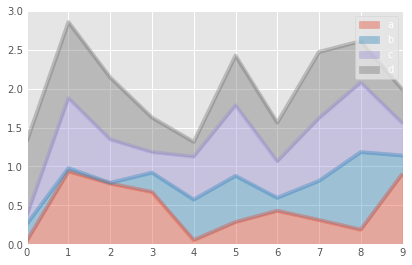

In [11]:
df2.plot.area(alpha=0.4)

## Barplots

In [12]:
df2.head()

,a,b,c,d
0,0.039762,0.218517,0.103423,0.957904
1,0.937288,0.041567,0.899125,0.977680
2,0.780504,0.008948,0.557808,0.797510
3,0.672717,0.247870,0.264071,0.444358
4,0.053829,0.520124,0.552264,0.190008


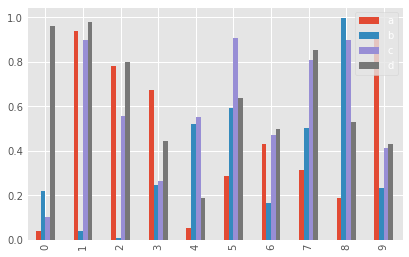

In [13]:
df2.plot.bar()

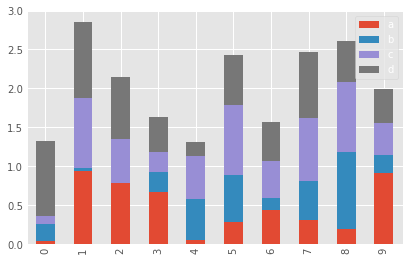

In [14]:
df2.plot.bar(stacked=True)

## Histogramas

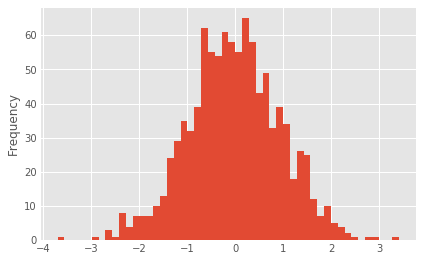

In [15]:
df1['A'].plot.hist(bins=50)

## Line Plots

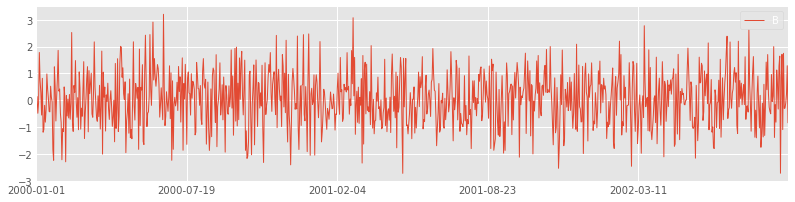

In [16]:
df1.plot.line(x=df1.index,y='B',figsize=(12,3),lw=1)

## Scatter Plots

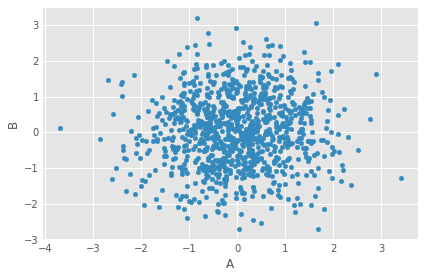

In [17]:
df1.plot.scatter(x='A',y='B')

Você pode usar c para colorir com base em outro valor de coluna.
Use o cmap para indicar o mapa de cores a ser usado.
Para todos os colormaps, confira: http://matplotlib.org/users/colormaps.html

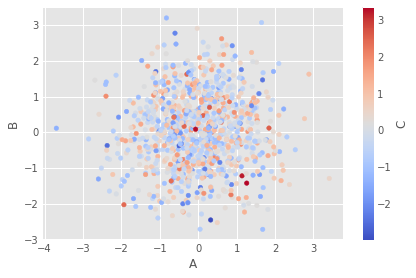

In [18]:
df1.plot.scatter(x='A',y='B',c='C',cmap='coolwarm')

Ou use s para indicar o tamanho com base em outra coluna. s parâmetro precisa ser uma matriz, não apenas o nome de uma coluna:

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\collections.py:877: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


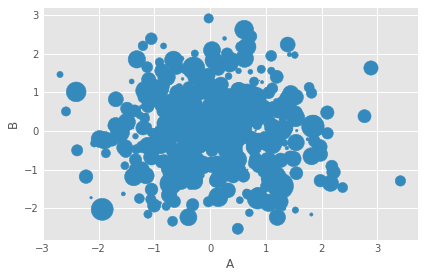

In [20]:
df1.plot.scatter(x='A',y='B',s=df1['C']*200)

## BoxPlots

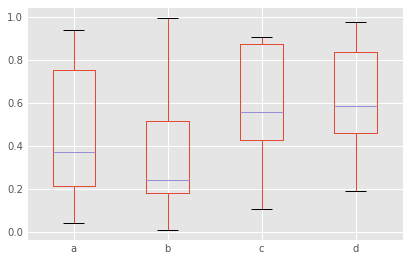

In [22]:
df2.plot.box()

## Hexagonal Bin Lote

Útil para Dados Bivariados, alternativa ao Scatterplot:

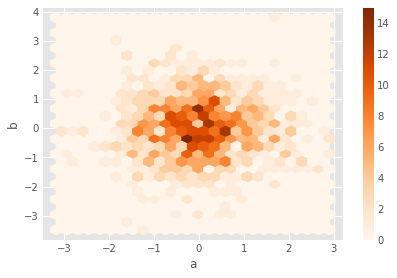

In [23]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=['a', 'b'])
df.plot.hexbin(x='a',y='b',gridsize=25,cmap='Oranges')

____

## Plot de Estimação de densidade de Kernel (Kernel Density Estimation - KDE)

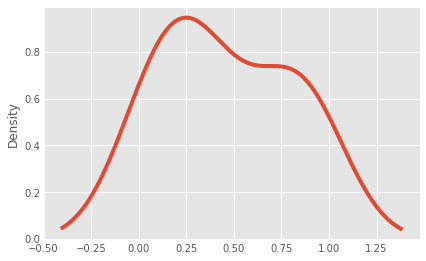

In [24]:
df2['a'].plot.kde()

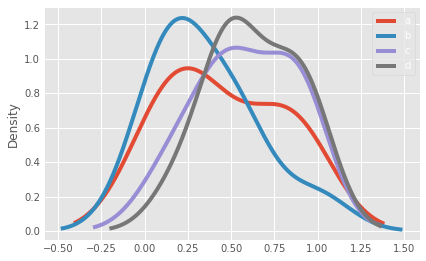

In [25]:
df2.plot.density()

### Trabalhar com data e hora

In [4]:
df = pd.read_csv('data/ppz-jan-fev-2017.csv')

In [5]:
df.head()

,hour,views
0,0,9
1,1,0
2,2,1
3,3,2
4,4,4


In [6]:
df.describe()

,hour,views
count,1416.000000,1416.000000
mean,707.500000,51.545198
std,408.908303,45.734594
min,0.000000,0.000000
25%,353.750000,16.000000
50%,707.500000,44.000000
75%,1061.250000,74.000000
max,1415.000000,486.000000


In [7]:
def to_date(value):
    return dt.datetime(2017, 1, 1) + dt.timedelta(hours=value)
df['date'] = df['hour'].apply(to_date)

In [8]:
df.head()

,hour,views,date
0,0,9,2017-01-01 00:00:00
1,1,0,2017-01-01 01:00:00
2,2,1,2017-01-01 02:00:00
3,3,2,2017-01-01 03:00:00
4,4,4,2017-01-01 04:00:00


In [9]:
del df['hour']

In [10]:
# Seta a data como índice
df.set_index(['date'], inplace=True)

In [11]:
df.head()

,views
date,
2017-01-01 00:00:00,9
2017-01-01 01:00:00,0
2017-01-01 02:00:00,1
2017-01-01 03:00:00,2
2017-01-01 04:00:00,4


/home/usuario/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


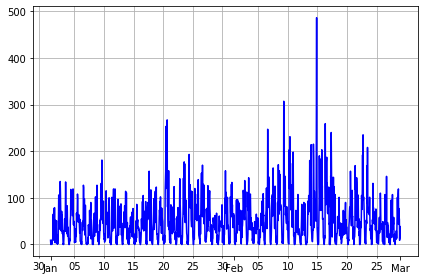

In [12]:
fig, ax = plt.subplots()
ax.plot_date(df.index.to_pydatetime(), df['views'], 'b-')
ax.xaxis.set_minor_locator(dates.DayLocator(bymonthday=range(5, 32, 5)))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
plt.tight_layout()
plt.show()

In [18]:
#import locale
#locale.setlocale(locale.LC_ALL, 'pt_BR')

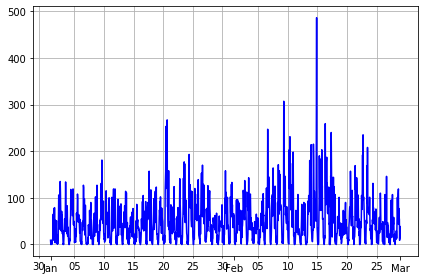

In [16]:
fig, ax = plt.subplots()
ax.plot_date(df.index.to_pydatetime(), df['views'], 'b-')
ax.xaxis.set_minor_locator(dates.DayLocator(bymonthday=range(5, 32, 5)))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
plt.tight_layout()
plt.show()

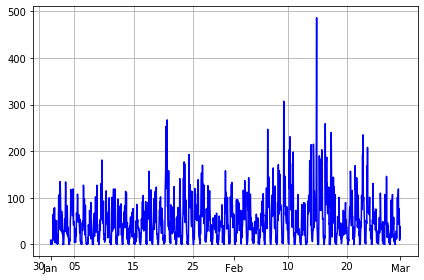

In [17]:
fig, ax = plt.subplots()
ax.plot_date(df.index.to_pydatetime(), df['views'], 'b-')
ax.xaxis.set_minor_locator(dates.DayLocator(bymonthday=range(5, 32, 5), interval=2))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('%b'))
plt.tight_layout()
plt.show()

### Outro exemplo

In [20]:
df3 = pd.read_csv('data/reported.csv')

In [21]:
df3.head()

,Year,crimes.total,crimes.penal.code,crimes.person,murder,assault,sexual.offenses,rape,stealing.general,burglary,...,vehicle.theft,out.of.vehicle.theft,shop.theft,robbery,fraud,criminal.damage,other.penal.crimes,narcotics,drunk.driving,population
0,1950,2784,2306,120,1,105,40,5,1578,295,...,NaN,NaN,NaN,3,209,72,477,0.0,49,7014000
1,1951,3284,2754,125,1,109,45,6,1899,342,...,NaN,NaN,NaN,3,310,73,530,0.0,66,7073000
2,1952,3160,2608,119,1,104,39,4,1846,372,...,NaN,NaN,NaN,3,217,82,553,0.0,78,7125000
3,1953,2909,2689,119,1,105,45,5,1929,361,...,NaN,NaN,NaN,4,209,88,220,0.0,91,7171000
4,1954,3028,2791,126,1,107,41,5,1981,393,...,NaN,NaN,NaN,4,236,101,237,0.0,103,7213000


In [22]:
df3.fillna(0, inplace=True)

In [23]:
df3.head()

,Year,crimes.total,crimes.penal.code,crimes.person,murder,assault,sexual.offenses,rape,stealing.general,burglary,...,vehicle.theft,out.of.vehicle.theft,shop.theft,robbery,fraud,criminal.damage,other.penal.crimes,narcotics,drunk.driving,population
0,1950,2784,2306,120,1,105,40,5,1578,295,...,0.0,0.0,0.0,3,209,72,477,0.0,49,7014000
1,1951,3284,2754,125,1,109,45,6,1899,342,...,0.0,0.0,0.0,3,310,73,530,0.0,66,7073000
2,1952,3160,2608,119,1,104,39,4,1846,372,...,0.0,0.0,0.0,3,217,82,553,0.0,78,7125000
3,1953,2909,2689,119,1,105,45,5,1929,361,...,0.0,0.0,0.0,4,209,88,220,0.0,91,7171000
4,1954,3028,2791,126,1,107,41,5,1981,393,...,0.0,0.0,0.0,4,236,101,237,0.0,103,7213000


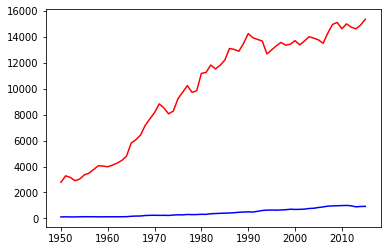

In [25]:
plt.plot(df3['Year'], df3['crimes.total'], '-r')
plt.plot(df3['Year'], df3['crimes.person'], '-b')
plt.show()

No handles with labels found to put in legend.


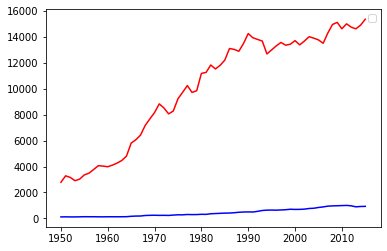

In [26]:
fig, ax = plt.subplots()
ax.plot(df3['Year'], df3['crimes.total'], '-r')
ax.plot(df3['Year'], df3['crimes.person'], '-b')
ax.legend()

No handles with labels found to put in legend.


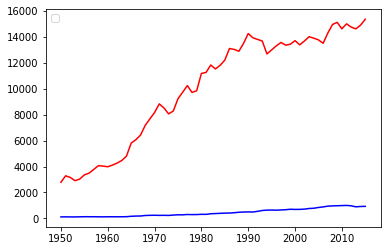

In [27]:
fig, ax = plt.subplots()
ax.plot(df3['Year'], df3['crimes.total'], '-r')
ax.plot(df3['Year'], df3['crimes.person'], '-b')
ax.legend(loc='upper left')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Crimes: Total x Person')

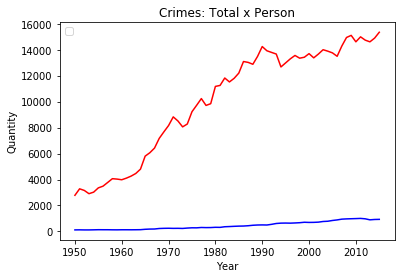

In [28]:
fig, ax = plt.subplots()
ax.plot(df3['Year'], df3['crimes.total'], '-r')
ax.plot(df3['Year'], df3['crimes.person'], '-b')
ax.legend(loc='upper left')
ax.set_ylabel('Quantity')
ax.set_xlabel('Year')
ax.set_title('Crimes: Total x Person')

No handles with labels found to put in legend.


[]

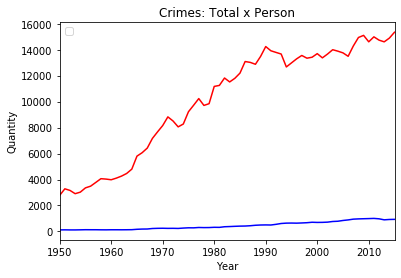

In [29]:
fig, ax = plt.subplots()
ax.plot(df3['Year'], df3['crimes.total'], '-r')
ax.plot(df3['Year'], df3['crimes.person'], '-b')
ax.legend(loc='upper left')
ax.set_ylabel('Quantity')
ax.set_xlabel('Year')
ax.set_title('Crimes: Total x Person')
ax.set_xlim([df3['Year'].min(), df3['Year'].max()])
ax.plot()